In [21]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# p 169  - TF-IDF를 활용한 모델 구현   .시작

In [22]:
DATA_IN_PATH = './data_in/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [23]:
vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)
x = vectorizer.fit_transform(reviews)

- min_df: 특정 토큰의 df(특정 단어 t 가 등장한 문서의 수) 값이 이 값보다 적게 나오면 벡터화 과정에서 제거함
- analyzer
        a. 분석하기 위한 n-gram 기준 단위, 'word' 와 'char' 2가지 옵션을 제공
        b. 'word'의 경우 단어 하나를 단위로 하는 것, 'char'는 문자 하나를 단위로 하는 것
        c. 여기서는 문자를 단위로 하기 때문에 'char'로 지정
- sublinear_tf
        a. 문서의 단어 빈도 수에 대한 smoothing 여부를 설정
        b. analyzer의 단위를 'char'로 했기 때문에 tf값이 너무 큰 값으로 나옴
        c. 이를 전체적으로 줄이는 스케일링의 일환으로 tf => 1 + log(tf)으로 대체함
- ngram_range: ngram에서 사용될 단위 수 n의 범위

In [24]:
features = vectorizer.get_feature_names()
print(features)

[' ', ' a', ' aa', ' ab', ' ac', ' ad', ' ae', ' af', ' ag', ' ah', ' ai', ' ak', ' al', ' am', ' an', ' ap', ' ar', ' as', ' at', ' au', ' av', ' aw', ' ax', ' az', ' b', ' b ', ' ba', ' bb', ' be', ' bi', ' bl', ' bo', ' br', ' bu', ' by', ' c', ' c ', ' ca', ' ce', ' cg', ' ch', ' ci', ' cl', ' co', ' cr', ' cu', ' cy', ' d', ' da', ' de', ' di', ' do', ' dr', ' du', ' dv', ' dw', ' dy', ' e', ' e ', ' ea', ' eb', ' ec', ' ed', ' ee', ' ef', ' eg', ' ei', ' el', ' em', ' en', ' ep', ' eq', ' er', ' es', ' et', ' eu', ' ev', ' ex', ' ey', ' f', ' f ', ' fa', ' fb', ' fe', ' fi', ' fl', ' fo', ' fr', ' fu', ' fx', ' g', ' g ', ' ga', ' ge', ' gh', ' gi', ' gl', ' go', ' gr', ' gu', ' gw', ' gy', ' h', ' h ', ' ha', ' hb', ' he', ' hi', ' hm', ' ho', ' hu', ' hy', ' i', ' ia', ' ic', ' id', ' ig', ' ii', ' il', ' im', ' in', ' ir', ' is', ' it', ' iv', ' j', ' j ', ' ja', ' je', ' ji', ' jo', ' jr', ' ju', ' k', ' k ', ' ka', ' ke', ' kh', ' ki', ' kl', ' kn', ' ko', ' kr', ' ku', ' ky

In [25]:
print(x.shape)

(25000, 5000)


In [26]:
RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(sentiments)
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [27]:
lgs = LogisticRegression(class_weight='balanced')
lgs.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

- class_weight='balanced'  
a. 타깃의 비율이 고르지 않을 경우 예를 들면, 이중 분류 문제에서 학습데이터의 구성이 특정한 한 쪽의 타깃으로 쏠릴 경우 데이터가 적은 타깃은 충분히 학습하지 못함  
b. 이런 언밸런스를 극복하기 위해 데이터가 적은 타깃에 대한 손실함수를 수행할 때, 가중치 벡터 W 에 더 많은 가중치를 부여함  
c. 이 때문에 커진 오차를 줄이기 위해 모델은 데이터가 적은 타깃에 대한 학습에 더 치중하게 됨  
d. 이 때 사용하는 W 에 곱하는 가중치는 다음과 같음  
wj=n_samples / (n_classes * n_samplesj)  
wj 각 클래스에 대한 가중치  
n_samples 전체 샘플의 수  
n_classes 전체 클래스 종류의 수(이진 분류는 2)  
n_samplesj 각 클래스의 샘플 수

In [28]:
predicted = lgs.predict(x_eval)
print(predicted)

[0 1 0 ... 0 0 0]


In [29]:
print("Accuracy: %f" % lgs.score(x_eval, y_eval))

Accuracy: 0.859800


In [30]:
TEST_CLEAN_DATA = 'test_clean.csv'
test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

In [31]:
print(test_data.head())

                                              review          id
0  naturally film main themes mortality nostalgia...  "12311_10"
1  movie disaster within disaster film full great...    "8348_2"
2  movie kids saw tonight child loved one point k...    "5828_4"
3  afraid dark left impression several different ...    "7186_2"
4  accurate depiction small time mob life filmed ...   "12128_7"


In [32]:
testDataVecs = vectorizer.transform(test_data['review'])    # review를 vectorizer함

In [33]:
# 이 vectorizer한 값으로 predic를 뽑음
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [34]:
# 결과를 보려면 케글에 올려야 함
# id별로 predict 결과를 보내줘야 함 (12311_10, 8348_2...) 

In [35]:
DATA_OUT_PATH = './data_out/'
# DATA_OUT_PATH = './data_out' 이렇게, 끝에 슬래시 안넣으면 data_outlgs_tfidf_answer.csv 이렇게 생김
# 생긴 파일은 지웠음..
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
    # id랑 항목으로, 원래 있던  test_data에 id값을 가져오고, sentiment란 결과값으로 test_predicted를 붙여줌
answer_dataset = pd.DataFrame({'id': test_data['id'], 'sentiment': test_predicted})

In [36]:
print(answer_dataset.head())   # 결과를 보면 이렇게 나옴

           id  sentiment
0  "12311_10"          1
1    "8348_2"          0
2    "5828_4"          1
3    "7186_2"          0
4   "12128_7"          1


In [37]:
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv', index=False, quoting=3)

In [ ]:
# 바로 위에거,  실제 넣은 데이터를 구경을 하면 이렇게 나옴

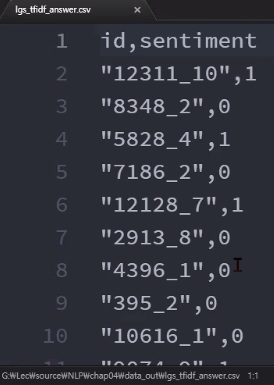

In [39]:
# 이러면 캐글에 제출할 준비는 끝난 것

In [40]:
# 캐글에 로그인 -> Bag of Words Meets Bags of Popcorn 으로 들어감
# -> 거기에 방금 만든 lgs_tdifd_answer.csv를 올릴 것


# 여기서 late Submission 으로 들어감 -> 거기서 방금 만든 파일을 drag and drop으로 갖다 놓음
# -> 업로드 되면서 진행상태 나옴 -> complete -> My Submission 가서 결과를 확인할 수 있음
# (밑에 검은 make submission 버튼 눌러야 완료되는건가..?)
# 0.85384, 0.85384 등으로 점수가 나옴 => 캐글이 대신 채점을 해주는 것